In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('http://covidtracking.com/api/states/daily.csv')
states = df.state.unique()

dfk = pd.DataFrame()
for s in states:
    dfs = df[df.state==s].copy()
    dfs['tested'] = dfs['positive'] + dfs['negative']
    dfs['daily_positive_increase'] = dfs['positive'].diff(periods=-1)
    dfs['daily_death_increase'] = dfs['death'].diff(periods=-1)
    dfs['daily_tested_increase'] = dfs['tested'].diff(periods=-1)
    dfk = dfk.append(dfs)
    
dfk = dfk.fillna(0)
df_la = dfk[dfk.state=="LA"]

In [3]:
df_la.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,tested,daily_positive_increase,daily_death_increase,daily_tested_increase
20,20200416,LA,22532.0,104054.0,0.0,1914.0,0.0,0.0,0.0,396.0,...,22,53.0,0.0,4077.0,581.0,4658.0,126586.0,581.0,53.0,4658.0
76,20200415,LA,21951.0,99977.0,0.0,1943.0,0.0,0.0,0.0,425.0,...,22,90.0,0.0,3073.0,433.0,3506.0,121928.0,433.0,90.0,3506.0
132,20200414,LA,21518.0,96904.0,0.0,1977.0,0.0,0.0,0.0,436.0,...,22,129.0,0.0,9829.0,502.0,10331.0,118422.0,502.0,129.0,10331.0
188,20200413,LA,21016.0,87075.0,0.0,2134.0,0.0,0.0,0.0,461.0,...,22,44.0,0.0,3625.0,421.0,4046.0,108091.0,421.0,44.0,4046.0
244,20200412,LA,20595.0,83450.0,0.0,2084.0,0.0,0.0,0.0,458.0,...,22,34.0,0.0,6549.0,581.0,7130.0,104045.0,581.0,34.0,7130.0


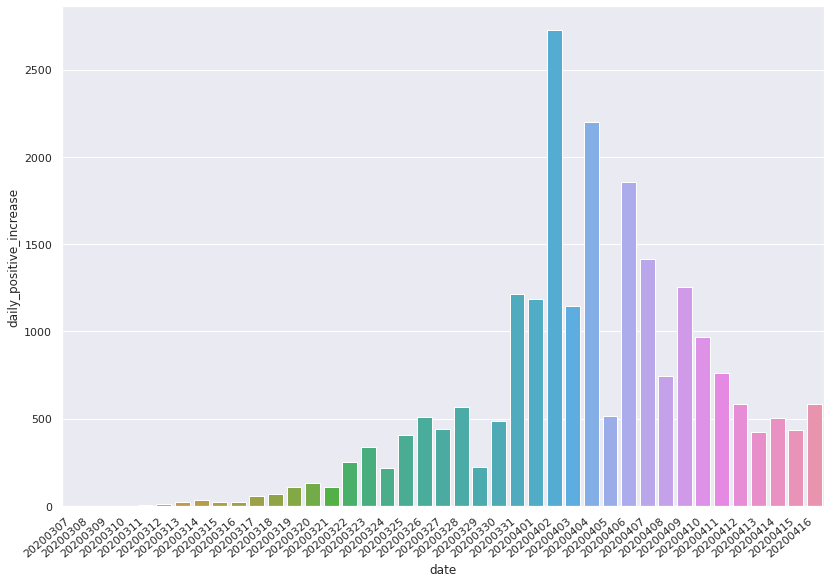

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='date', y= 'daily_positive_increase', data=df_la)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [5]:
dfk[dfk.state=="OR"].iloc[0]

date                                                        20200416
state                                                             OR
positive                                                        1736
negative                                                       33202
pending                                                            0
hospitalizedCurrently                                            307
hospitalizedCumulative                                           414
inIcuCurrently                                                    89
inIcuCumulative                                                    0
onVentilatorCurrently                                             43
onVentilatorCumulative                                             0
recovered                                                          0
hash                        7687b415f103f263c88274f27175bd5f223e0fcf
dateChecked                                     2020-04-16T20:00:00Z
death                             

In [6]:
import pandas as pd
import datetime
base_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
yesterday = f"{datetime.datetime.now() - datetime.timedelta(days=1):%m-%d-%Y}"
full_url = f"{base_url}{yesterday}.csv"
df = pd.read_csv(full_url)

In [7]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-15 22:56:51,34.223334,-82.461707,10,0,0,10,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-15 22:56:51,30.295065,-92.414197,105,5,0,100,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-15 22:56:51,37.767072,-75.632346,15,0,0,15,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-15 22:56:51,43.452658,-116.241552,538,9,0,529,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-15 22:56:51,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [8]:
df[df.Province_State=="Oregon"]['Confirmed'].sum()

1663

In [9]:
import pandas as pd
import datetime
base_url="https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(base_url)

In [10]:
df = df.drop(['Lat', 'Long'], axis=1)

In [11]:
ncountries = sorted(df['Country/Region'].unique().tolist())

In [12]:
#ncountries

In [13]:
dfa = pd.DataFrame()
for i, country in enumerate(ncountries):
    dfc = df[df['Country/Region'] == country].copy()
    if len(dfc) > 1:
        dfc = dfc.drop(['Province/State'], axis=1).groupby('Country/Region').sum().reset_index()
    else:
        dfc = dfc.drop(['Province/State'], axis=1)
    dfc2 = dfc.melt(id_vars=["Country/Region"], 
                        var_name="Date",
                        value_name="cases")
    dfc2 = dfc2.rename({'Country/Region': 'country'}, axis=1)
    dfa = dfa.append(dfc2)

In [14]:
dfa[dfa.country=="France"].tail(20)

,country,Date,cases
65,France,3/27/20,33402
66,France,3/28/20,38105
67,France,3/29/20,40708
68,France,3/30/20,45170
69,France,3/31/20,52827
70,France,4/1/20,57749
71,France,4/2/20,59929
72,France,4/3/20,65202
73,France,4/4/20,69500
74,France,4/5/20,71412


In [15]:
dfa.country.nunique()

185